In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy
import warnings

In [2]:
#Importation de notre Dataframe
df= pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
#Affichage de notre Dataframe
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
# Supprimer la catégorie "Other" du DataFrame
df = df[df['gender'] != 'Other']
df.gender.unique()

array(['Male', 'Female'], dtype=object)

In [5]:
#Affichage des variables categorielles
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5109 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5109 non-null   int64  
 1   gender             5109 non-null   object 
 2   age                5109 non-null   float64
 3   hypertension       5109 non-null   int64  
 4   heart_disease      5109 non-null   int64  
 5   ever_married       5109 non-null   object 
 6   work_type          5109 non-null   object 
 7   Residence_type     5109 non-null   object 
 8   avg_glucose_level  5109 non-null   float64
 9   bmi                4908 non-null   float64
 10  smoking_status     5109 non-null   object 
 11  stroke             5109 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 518.9+ KB


In [6]:
#Noms de colonnes avec le nombre de valeurs quantitatives ou qualitatives(si sup à 3 c'est Quantitativ sinon Qualitativ)
liste_colonnes=df.columns
print(liste_colonnes)
df.nunique()

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


id                   5109
gender                  2
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3978
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [7]:
# Nomination des variables qualitatives et quantitatives
variables_quantitatives= ['age', 'avg_glucose_level', 'bmi']
variables_qualitatives= ['gender', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'smoking_status', 'stroke']

In [8]:
# Affichage des colonnes object
total_df = df.describe(include='object')
total_df

,gender,ever_married,work_type,Residence_type,smoking_status
count,5109,5109,5109,5109,5109
unique,2,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2924,2596,1892


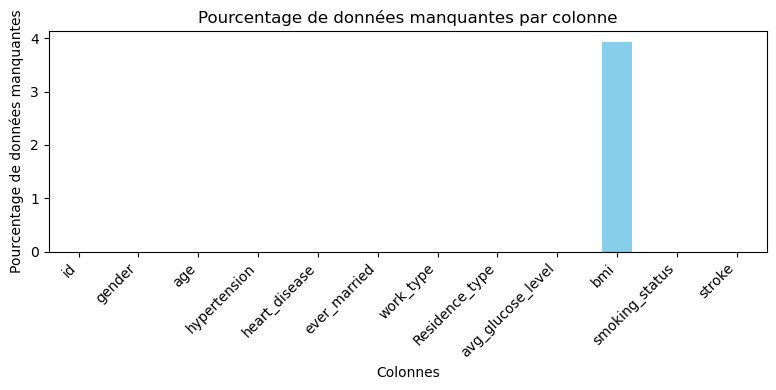

In [9]:
# Calculer le pourcentage de données manquantes par colonne
pourcentage_manquant_par_colonne = (df.isnull().sum() / len(df)) * 100

# Créer le graphique à barres
plt.figure(figsize=(8, 4))
pourcentage_manquant_par_colonne.plot(kind='bar', color='skyblue')
plt.title('Pourcentage de données manquantes par colonne')
plt.xlabel('Colonnes')
plt.ylabel('Pourcentage de données manquantes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [10]:
# Affichage de colonnes avec de données numériques
total_df = df.describe()
total_df

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5109.000000,5109.000000,5109.000000,5109.000000,5109.000000,4908.00000,5109.000000
mean,36513.985516,43.229986,0.097475,0.054022,106.140399,28.89456,0.048738
std,21162.008804,22.613575,0.296633,0.226084,45.285004,7.85432,0.215340
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.30000,0.000000
25%,17740.000000,25.000000,0.000000,0.000000,77.240000,23.50000,0.000000
50%,36922.000000,45.000000,0.000000,0.000000,91.880000,28.10000,0.000000
75%,54643.000000,61.000000,0.000000,0.000000,114.090000,33.10000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.60000,1.000000


# Analyse univariée pour les variables quantitatives :

In [11]:
# Suppression des lignes contenant des valeurs NaN dans la colonne 'bmi'
df.dropna(subset=['bmi'], inplace=True)

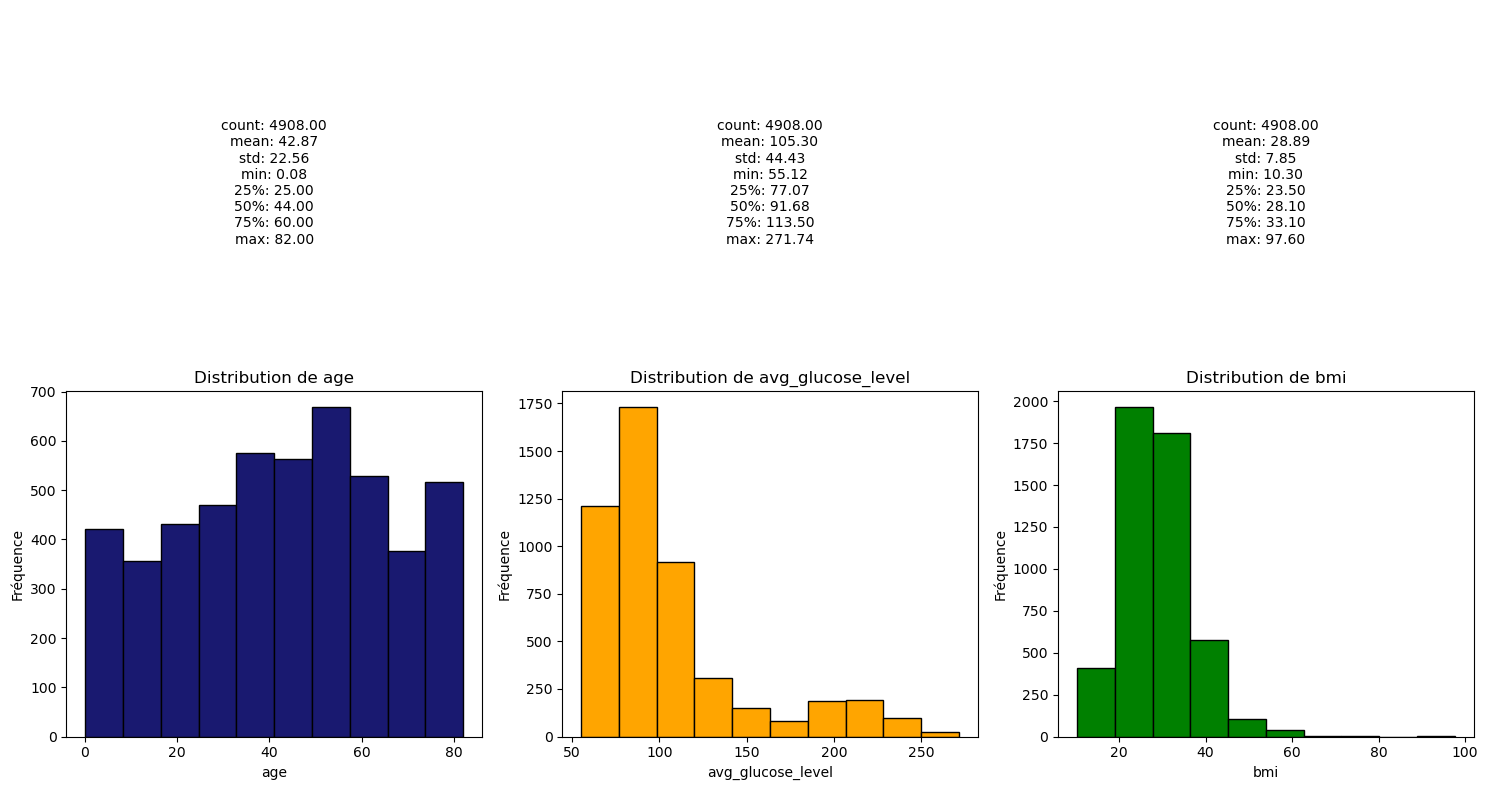

In [12]:
# Liste des variables quantitatives (Graph à barres)
variables_quantitatives = ['age', 'avg_glucose_level', 'bmi']
colors = ['midnightblue', 'orange', 'green']

# Création d'une figure globale avec des sous-graphiques
fig, axes = plt.subplots(2, len(variables_quantitatives), figsize=(15, 8))

# Boucle pour générer les graphiques pour chaque variable + histogrammes
for i, (variable, color) in enumerate(zip(variables_quantitatives, colors)):

    axes[1, i].hist(df[variable], bins=10, color=color, edgecolor='black')
    axes[1, i].set_title(f'Distribution de {variable}')
    axes[1, i].set_xlabel(variable)
    axes[1, i].set_ylabel('Fréquence')

# Statistiques descriptives
    stats = df[variable].describe()
    stats_text = "\n".join([f"{stat}: {value:.2f}" for stat, value in stats.items()])

# Ajout des statistiques descriptives au-dessus du leur graphique
    axes[0, i].text(0.5, 0.5, stats_text, fontsize=10, ha='center', va='center', transform=axes[0, i].transAxes)
    axes[0, i].axis('off')
    
plt.tight_layout()
plt.show()

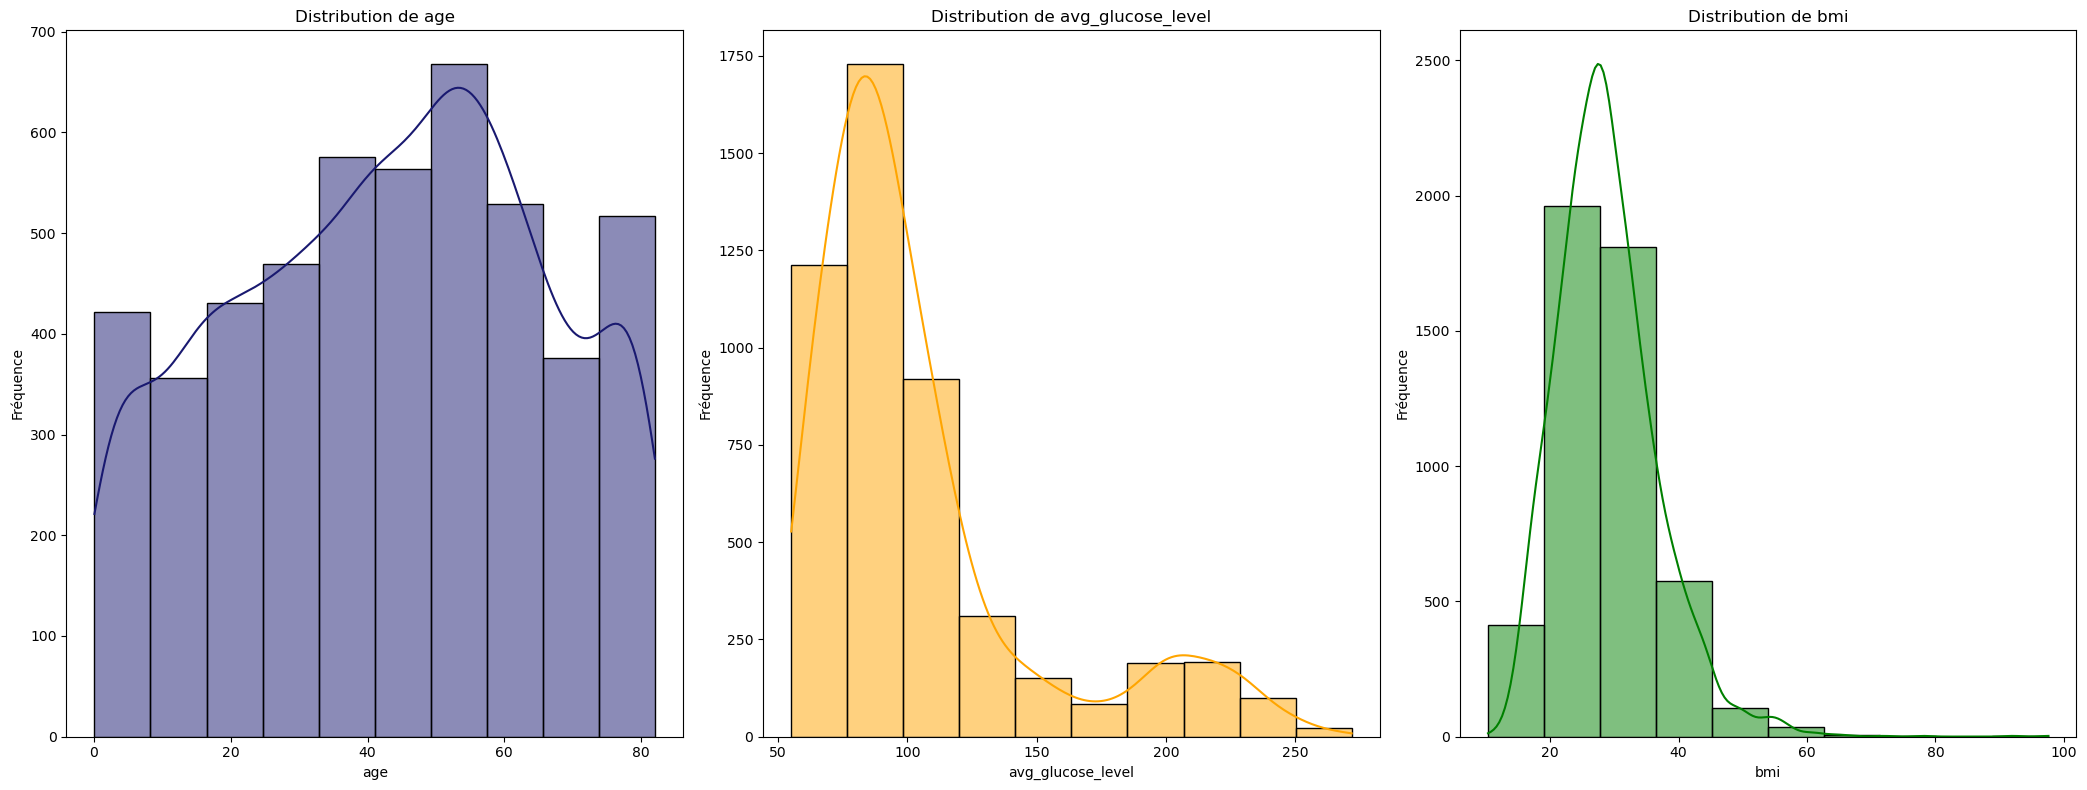

In [13]:
# Ignorer les avertissements de FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning)

# Liste des variables quantitatives
variables_quantitatives = ['age', 'avg_glucose_level', 'bmi']
colors = ['midnightblue', 'orange', 'green']

# Création d'une figure globale avec des sous-graphiques
fig, axes = plt.subplots(1, len(variables_quantitatives), figsize=(21, 8))

# Boucle pour générer les graphiques pour chaque variable + histogrammes - KDE
for i, (variable, color) in enumerate(zip(variables_quantitatives, colors)):
    # Distribution avec Seaborn
    sns.histplot(df[variable], bins=10, color=color, ax=axes[i], edgecolor='black', kde = True)
    axes[i].set_title(f'Distribution de {variable}')
    axes[i].set_xlabel(variable)
    axes[i].set_ylabel('Fréquence')

    # Statistiques descriptives
    stats = df[variable].describe()
    stats_text = "\n".join([f"{stat}: {value:.2f}" for stat, value in stats.items()])
    
plt.tight_layout()
plt.show()

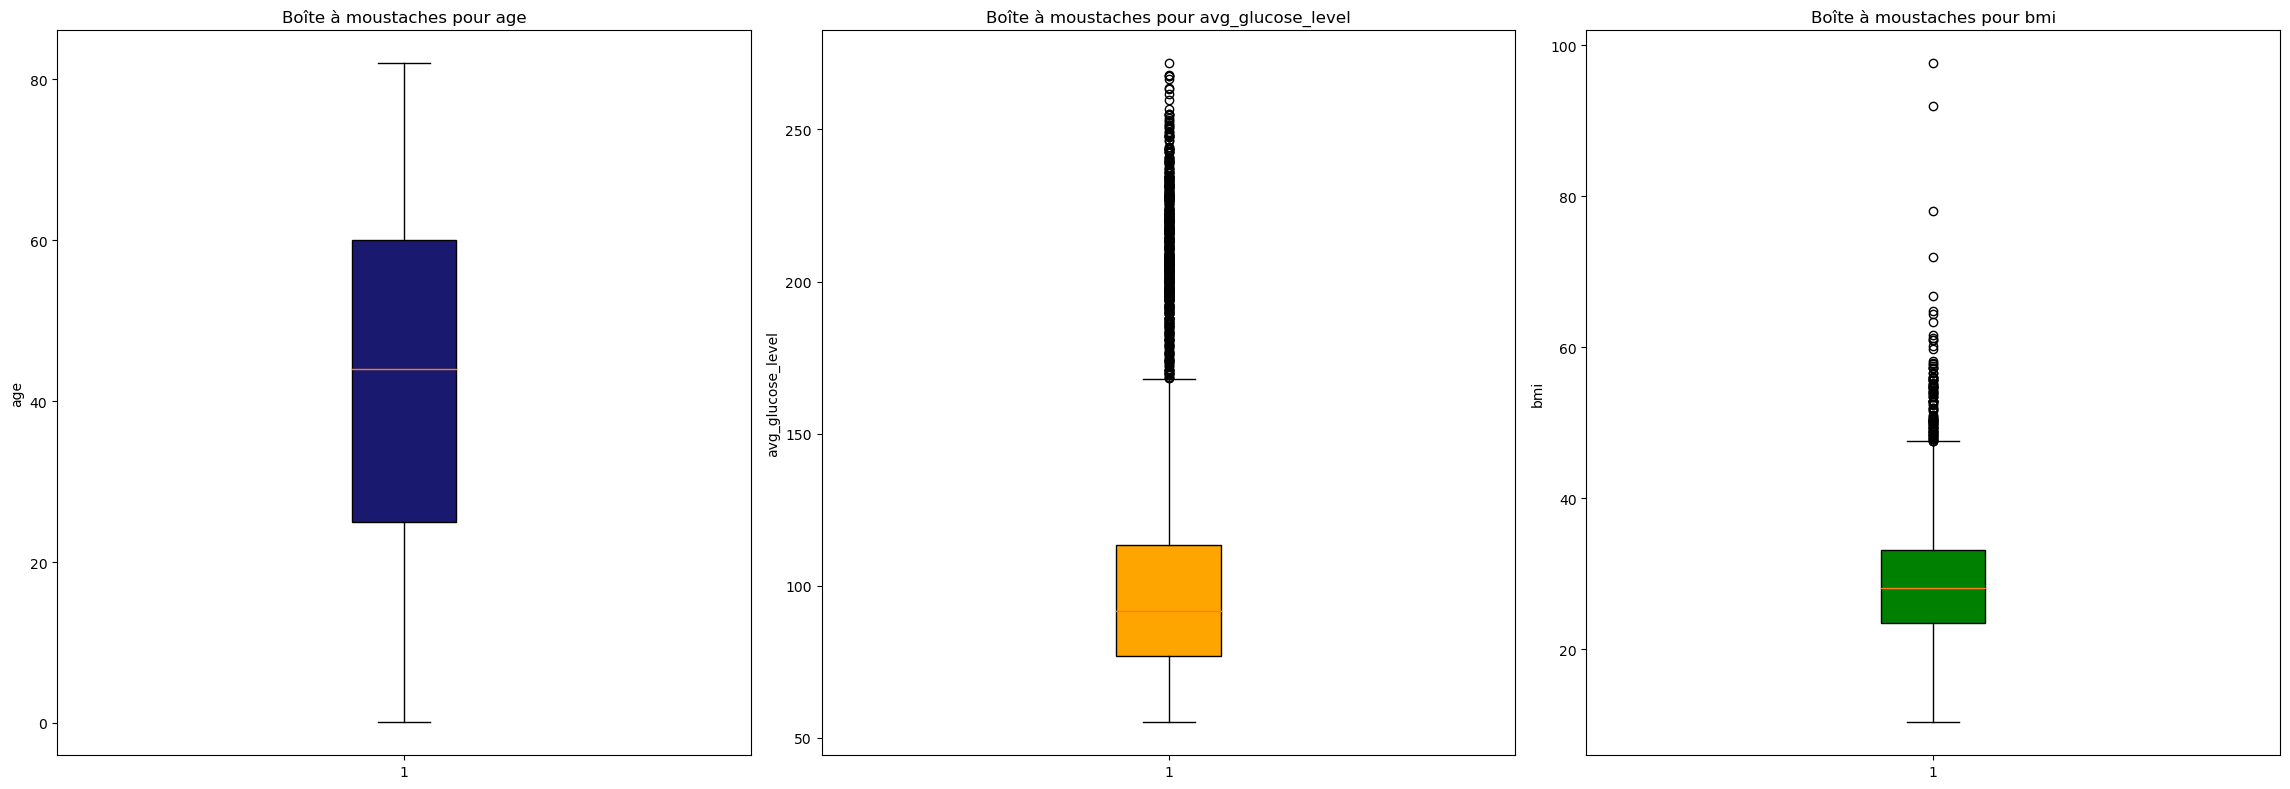

In [14]:
# Liste des variables quantitatives (Graph à moustaches)
variables_quantitatives = ['age', 'avg_glucose_level', 'bmi']
colors = ['midnightblue', 'orange', 'green']

# Création d'une figure globale avec des sous-graphiques
fig, axes = plt.subplots(1, len(variables_quantitatives), figsize=(23, 8))

# Boucle pour générer les graphiques pour chaque variable + boîtes à moustaches
for i, (variable, color) in enumerate(zip(variables_quantitatives, colors)):
    # Boîte à moustaches
    axes[i].boxplot(df[variable], patch_artist=True, boxprops=dict(facecolor=color))
    axes[i].set_title(f'Boîte à moustaches pour {variable}')
    axes[i].set_ylabel(variable)

# Statistiques descriptives
    stats = df[variable].describe()
    stats_text = "\n".join([f"{stat}: {value:.2f}" for stat, value in stats.items()])

plt.tight_layout()
plt.show()

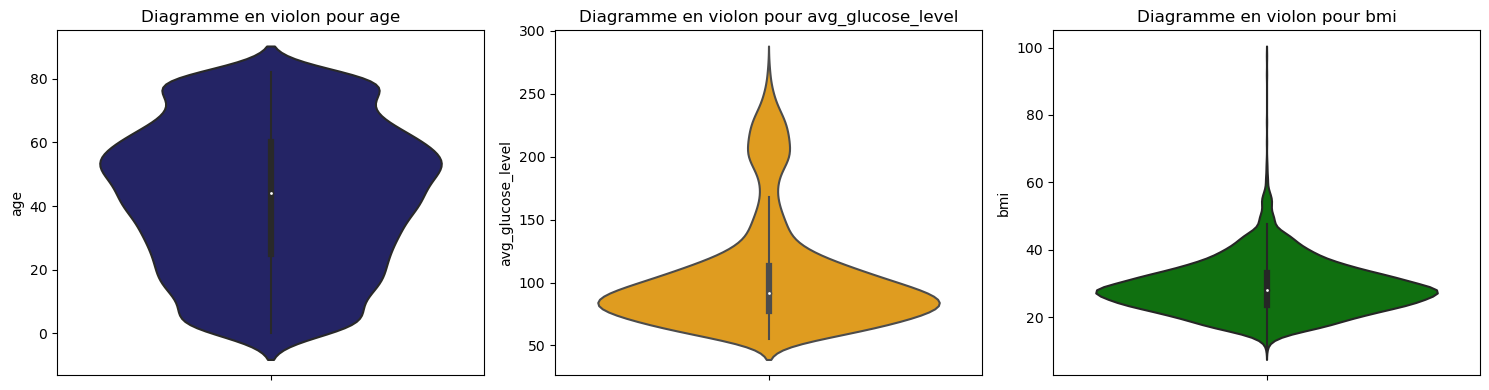

In [15]:
# Liste des variables quantitatives
variables_quantitatives = ['age', 'avg_glucose_level', 'bmi']
colors = ['midnightblue', 'orange', 'green']

# Création d'une figure globale avec des sous-graphiques
fig, axes = plt.subplots(1, len(variables_quantitatives), figsize=(15, 4))

# Boucle pour générer les diagrammes en violon pour chaque variable
for i, (variable, color) in enumerate(zip(variables_quantitatives, colors)):
    # Diagramme en violon
    sns.violinplot(data=df, y=variable, ax=axes[i], color=color)
    axes[i].set_title(f'Diagramme en violon pour {variable}')
    axes[i].set_ylabel(variable)

plt.tight_layout()
plt.show()

# Analyse univariée pour les variables qualitatives 

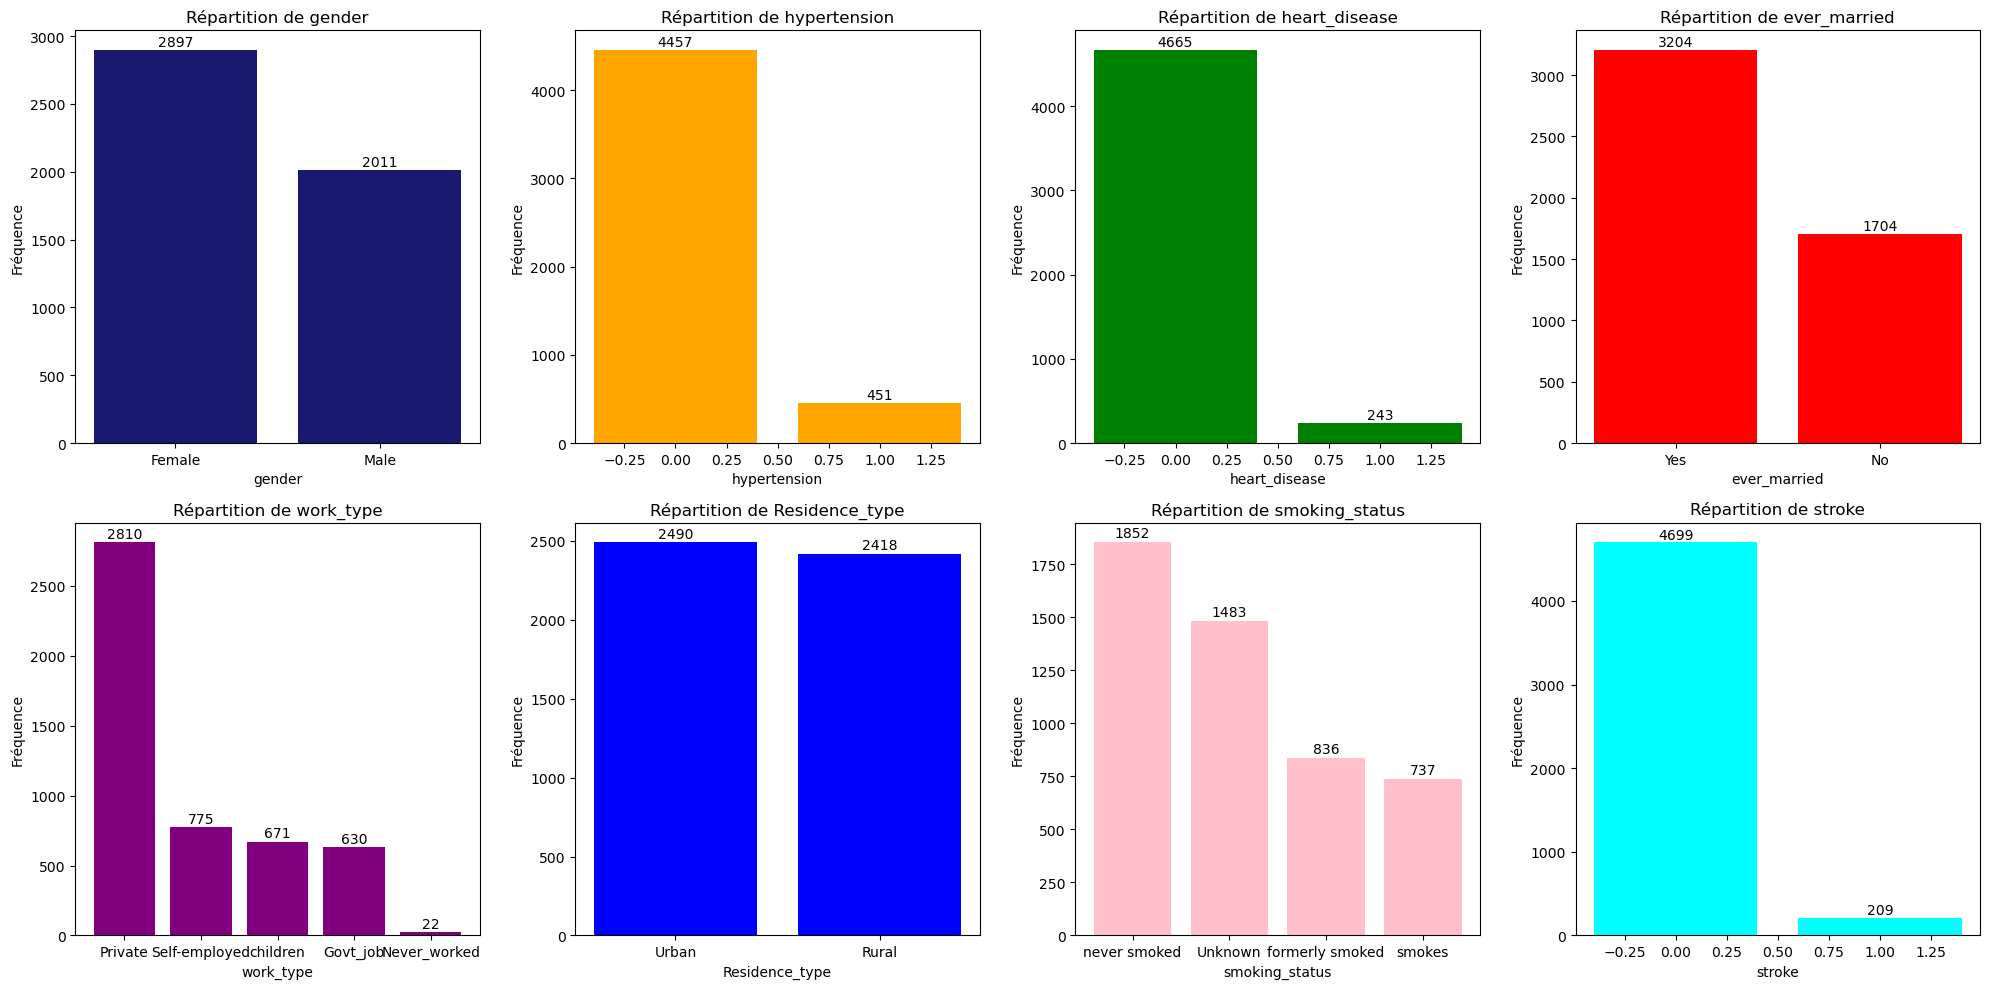

In [16]:
variables_qualitatives = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']
colors = ['midnightblue', 'orange', 'green', 'red', 'purple', 'blue', 'pink', 'cyan']

# Calcul du nombre de graphiques sur chaque rangée
num_total_variables = len(variables_qualitatives)
num_graphs_per_row = 4  # Quatre graphiques par ligne
num_rows = (num_total_variables + num_graphs_per_row - 1) // num_graphs_per_row

# Création d'une figure globale avec des sous-graphiques
fig, axes = plt.subplots(num_rows, num_graphs_per_row, figsize=(20, num_rows*5))

# Boucle pour générer les graphiques pour chaque variable qualitative + diagrammes en barres
for i, (variable, color) in enumerate(zip(variables_qualitatives, colors)):
    # Compter les occurrences de chaque catégorie
    counts = df[variable].value_counts()

    # Identifier les sous-graphiques
    row = i // num_graphs_per_row
    col = i % num_graphs_per_row

    # Diagramme en barres
    ax = axes[row, col]
    ax.bar(counts.index, counts.values, color=color)
    ax.set_title(f'Répartition de {variable}')
    ax.set_xlabel(variable)
    ax.set_ylabel('Fréquence')

    # Ajout des valeurs au-dessus des barres
    for j, count in enumerate(counts.values):
        ax.text(j, count + 10, str(count), ha='center', va='bottom')

# Ajuster l'espacement entre les sous-graphiques
plt.subplots_adjust(hspace=0.7, wspace=0.5)

plt.tight_layout()
plt.show()

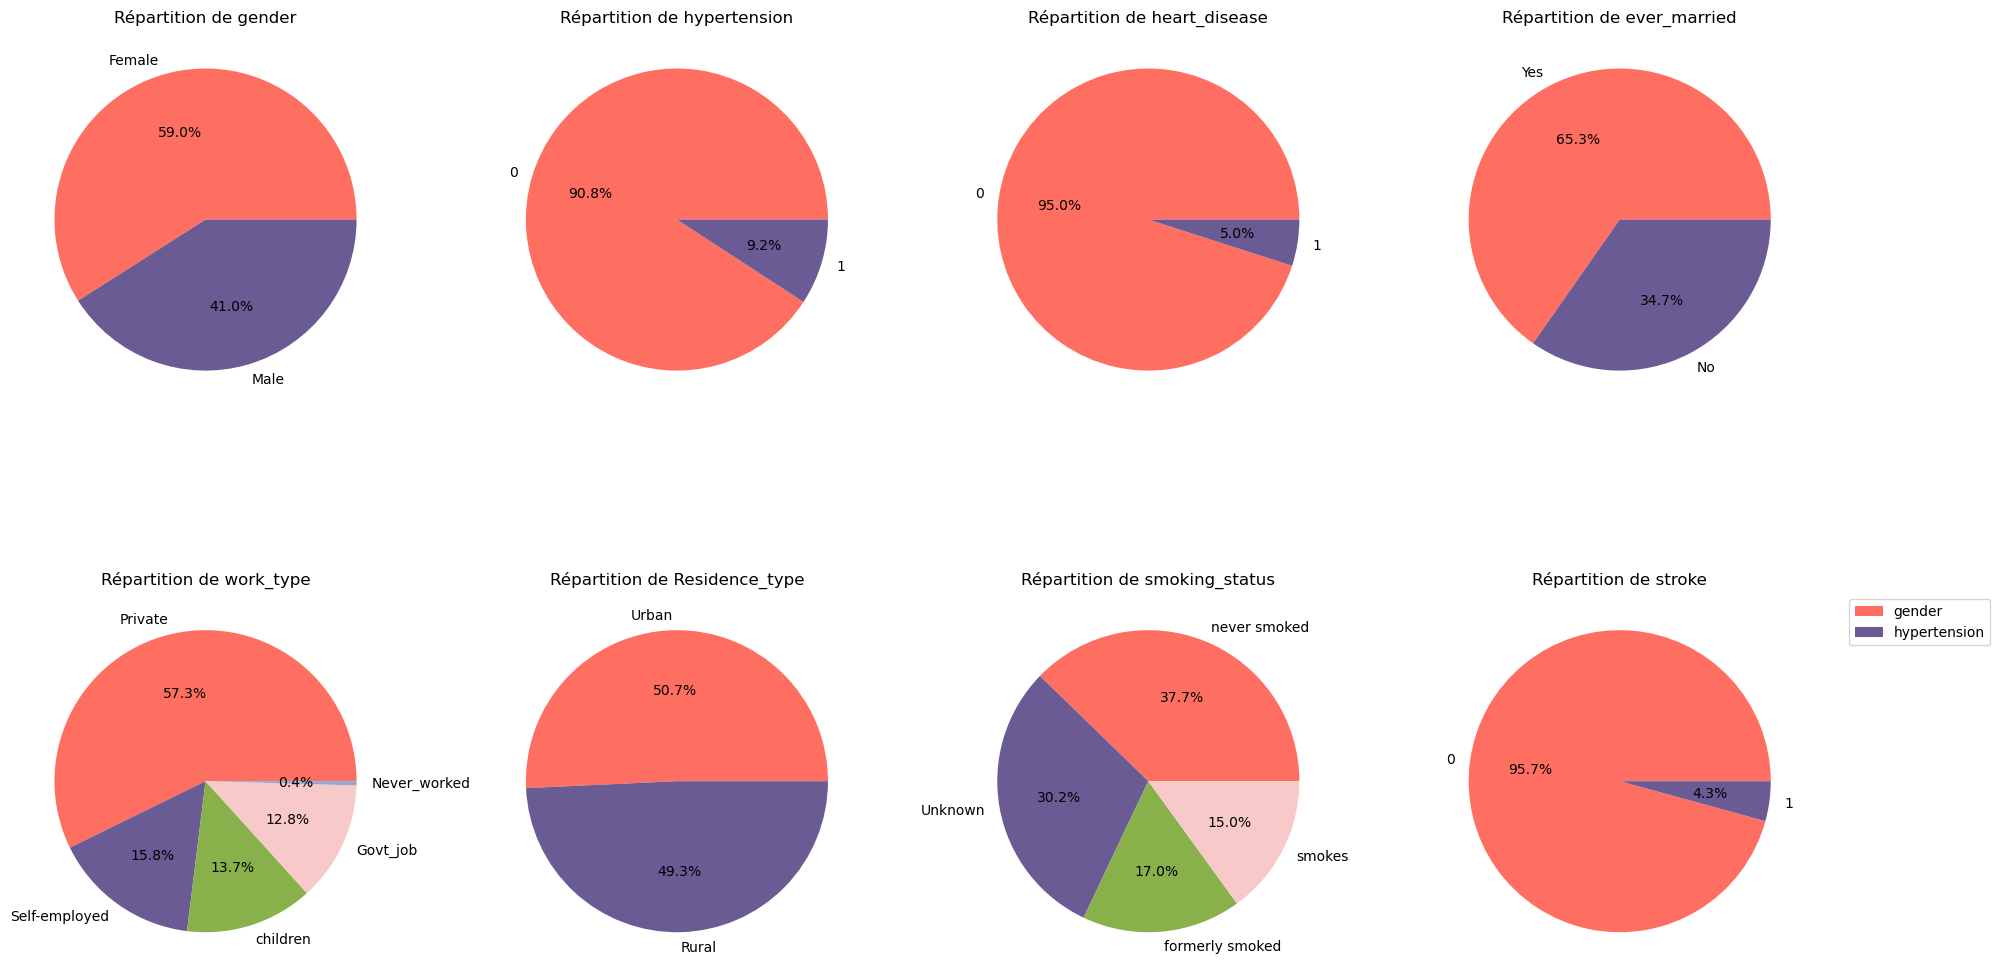

In [37]:
# Liste des variables qualitatives
variables_qualitatives = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']
colors = ['#FF6F61', '#6B5B95', '#88B04B', '#F7CAC9', '#92A8D1', '#955251', '#B565A7', '#009B77']

# Calcul du nombre de graphiques sur chaque rangée
num_total_variables = len(variables_qualitatives)
num_graphs_per_row = 4  # Quatre graphiques par ligne
num_rows = (num_total_variables + num_graphs_per_row - 1) // num_graphs_per_row

# Définir la taille de la figure
figsize_width = 20  # Largeur de la figure
figsize_height = num_rows * 6  # Hauteur de la figure, ajustée en fonction du nombre de lignes

# Création d'une figure globale avec des sous-graphiques
fig, axes = plt.subplots(num_rows, num_graphs_per_row, figsize=(figsize_width, figsize_height))

# Boucle pour générer les graphiques pour chaque variable qualitative + diagrammes en camembert
for i, (variable, color) in enumerate(zip(variables_qualitatives, colors)):
    # Comptage des occurrences de chaque catégorie
    counts = df[variable].value_counts()

    # Identifier les sous-graphiques
    row = i // num_graphs_per_row
    col = i % num_graphs_per_row

    # Diagramme en camembert
    ax = axes[row, col]
    ax.pie(counts, labels=counts.index, colors=colors[:len(counts)], autopct='%1.1f%%')
    ax.set_title(f'Répartition de {variable}')
    ax.set_ylabel('')

# Ajouter une légende
plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1), labels=variables_qualitatives)

plt.tight_layout()
plt.show()